In [2]:
import statsmodels.api as sm       
from statsmodels.formula.api import ols, logit

In [3]:
bp = pd.read_excel('bloodpress.xlsx')

<IPython.core.display.Javascript object>

In [5]:
bp.shape

(20, 8)

### Data Description

In [6]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pt      20 non-null     int64  
 1   BP      20 non-null     int64  
 2   Age     20 non-null     int64  
 3   Weight  20 non-null     float64
 4   BSA     20 non-null     float64
 5   Dur     20 non-null     float64
 6   Pulse   20 non-null     int64  
 7   Stress  20 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 1.4 KB


In [22]:
#bp.drop(['pt'],axis = 1,inplace = True)
bp.rename(columns = {'Dur': 'Duration'},inplace = True)

<IPython.core.display.Javascript object>

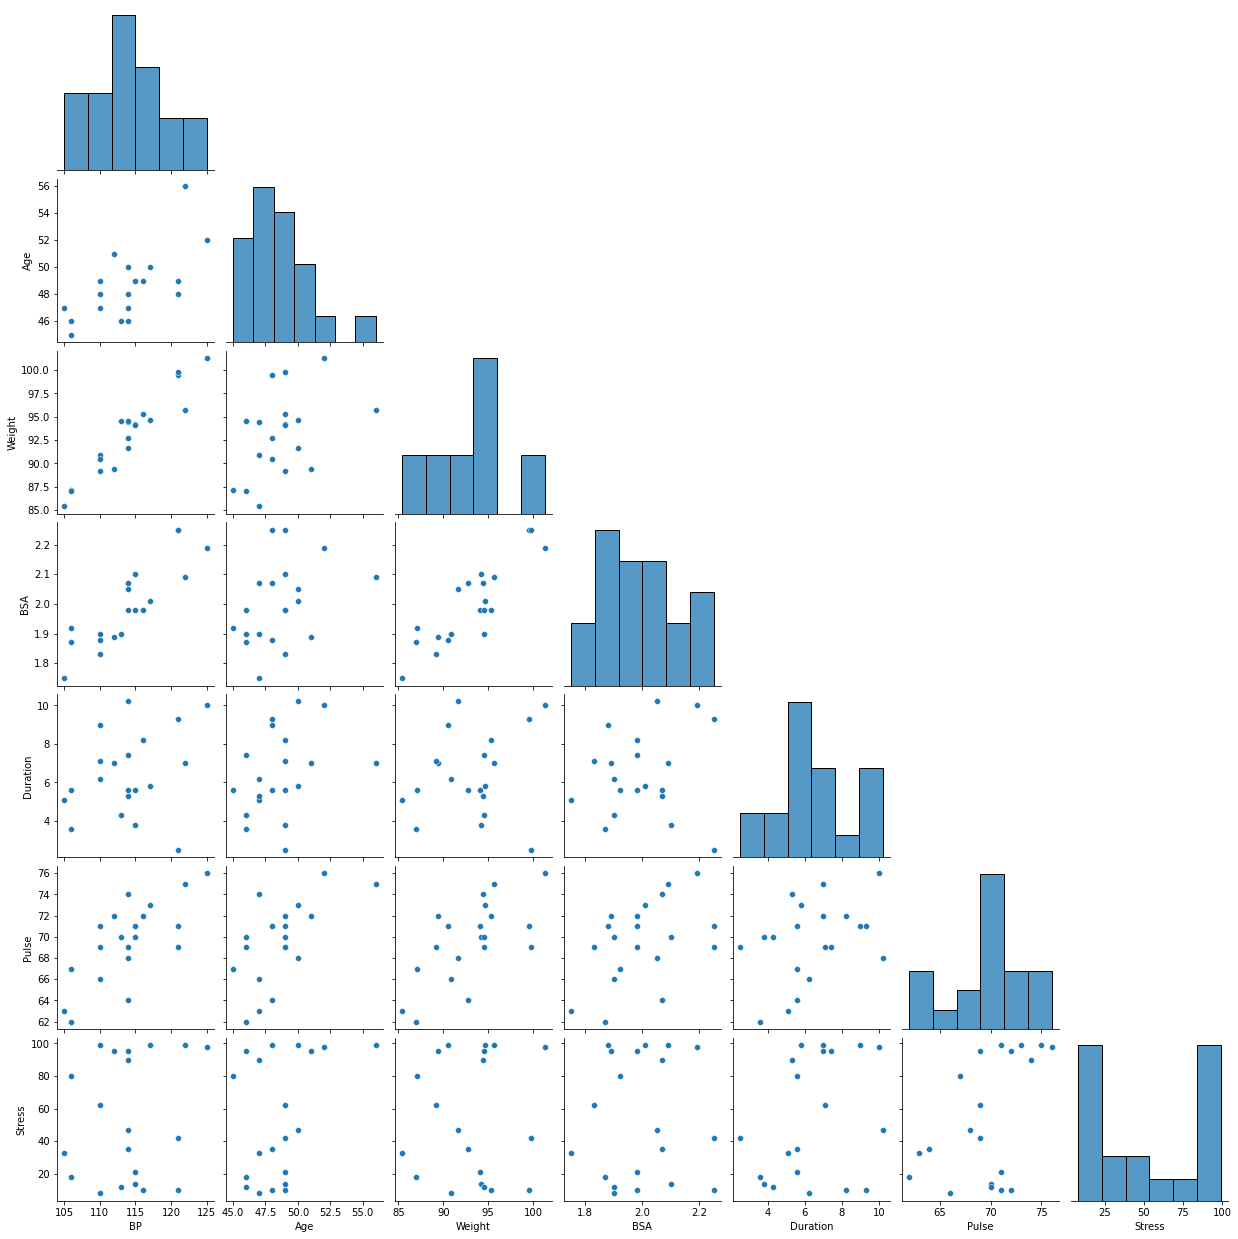

In [23]:
sns.pairplot(data = bp,corner = True)

### Correlation

In [24]:
corr = bp.corr()
corr

,BP,Age,Weight,BSA,Duration,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Duration,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

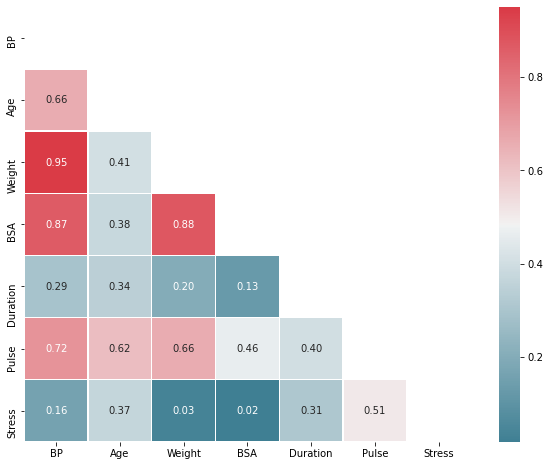

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr,cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)


__RESULT__ : <br>
There is a strong positve correllation between bp and age,weight,body surface aread and pulse<br>
Considering $α_E$ = 0.15 and $α_R$ = 0.15. <br>

### Fitting the regression model with predictor $x_2$

In [29]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BP        20 non-null     int64  
 1   Age       20 non-null     int64  
 2   Weight    20 non-null     float64
 3   BSA       20 non-null     float64
 4   Duration  20 non-null     float64
 5   Pulse     20 non-null     int64  
 6   Stress    20 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 KB


In [38]:
formula1 = "BP ~ Age"
formula2 = "BP ~ Weight"
formula3 = "BP ~ BSA"
formula4 = "BP ~ Duration"
formula5 = "BP ~ Pulse"
formula6 = "BP ~ Stress"

In [42]:
mlr = ols(formula3,data = bp)
estimates = mlr.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     53.93
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           8.11e-07
Time:                        18:57:17   Log-Likelihood:                -47.848
No. Observations:                  20   AIC:                             99.70
Df Residuals:                      18   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.1833      9.392      4.811      0.0

In [43]:

formula1 = "BP ~ Age+Weight"
formula2 = "BP ~ Age+BSA"
formula3 = "BP ~ Age+ Duration"
formula4 = "BP ~ Age+Pulse"
formula5 = "BP ~ Age+Stress"

In [49]:
mlr = ols(formula5,data = bp)
estimates = mlr.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     6.722
Date:                Tue, 15 Jun 2021   Prob (F-statistic):            0.00707
Time:                        19:06:21   Log-Likelihood:                -55.874
No. Observations:                  20   AIC:                             117.7
Df Residuals:                      17   BIC:                             120.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6248     20.081      2.073      0.0

In [50]:
formula1 = "BP ~ Age+Weight+BSA"
formula2 = "BP ~ Age+Weight+Duration"
formula3 = "BP ~ Age+Weight+Pulse"
formula4 = "BP ~ Age+Weight+Stress"

In [56]:
mlr = ols(formula1,data = bp)
estimates = mlr.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     971.9
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           2.62e-18
Time:                        19:22:11   Log-Likelihood:                -9.5930
No. Observations:                  20   AIC:                             27.19
Df Residuals:                      16   BIC:                             31.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.6672      2.647     -5.164      0.0